In [54]:
doc"""
esta función calcula $\int_{a}^{b}f(x)dx$ usando rectangulos, por favor introduzca: (función,a,b,numero de rectangulos)
"""
function intr(f,a,b,n)
    h=(b-a)/n
    I=0 #iniciamos la suma en cero
    for i in 1:n #Ciclo for, se detiene al completar los n subintervalos inducidos
        c=((2*a)+h)/2 #este es el argumento en la fórmula
        r=f(c)*h #Hacemos el área del rectangulo inducido en el i-ésimo subintervalo
        I=I+r #Acumulamos el valor en la suma
        a=a+h #hacemos que avance al siguiente rectangulo
    end
    return I #Muestra el valor de la fórmula que teniamos
end     

intr

In [53]:
doc"""
esta función calcula la integral $\int_{a}^{b} f(x)dx$ usando formula de trapecio
(función,a,b,#de trapecios) defina la función previamente
"""
function intt(f,a,b,n)
    l=(b-a)/n #La longitud de cada subintervalo dada la partición
    I=0 #iniciamos la suma
    for i in 1:n #Ciclo for para realizar la suma que aparece en la fórmula
        c=a+(i*l) #esto según la fórmula es donde se evalua la función
        I=I+l*f(c) #cada vez le añadimos cada sumando
    end
    return I #Muestra el valor de la fórmula de trapecios
end     

intt

# integración e interpolación

en esta ultima parte vamos a aplicar el ultimo metodo de integración y veremos basicamente un programa de interpolación.

## método de Simpson

ahora vamos a crear una función que dada f, y limites superiores nos calcule la integral usando la fórmula de Simpson

In [59]:
doc"""
esta función calcula $\int_{a}^{b}f(x)dx$ usando método de simpson para una sola interpolación, introduzca (función,a,b)
defina la función previamente
"""
function ints(f,a,b,n)
    x=symbols("x") #Declaramos la variable simbólica x
    longitud=abs((b-a)/n) #La longitud de cada subintervalo dada la partición
    g(x)=f(x) #La función f definida con la variable x
    st=0 #Acumulador de los valores de las integrales en cada subintervalo
    c=a+longitud #Variable que nos define el supremo (punto final) de cada subintevralo
    for i in 1:n #Ciclo for que corre de 1 a n para evaluar los n intervalos
        aint=((c-a)/6)*(f(a)+4f((a+c)/2)+f(c)) #Aplicando Método de Simpson en cada subintervalo
        st=st+aint #Representación de la suma parcial a la iésima iteración
        a=c #Redefinimos a para analizar el proximo intervalo
        c=c+longitud #Redefinimos c para analizar el proximo intervalo
    end #Fin de for
    return st #Arrojar el resultado de st
end #Fin

ints

In [3]:
? ints

search: IntSet print_shortest intersect intersect! typeintersect @int128_str



esta función calcula $\int_{a}^{b}f(x)dx$ usando método de simpson para una sola interpolación, introduzca (función,a,b) defina la función previamente


In [4]:
f(x)=x*x#probamos con algo que ya sabemos que debe dar exacto

f (generic function with 1 method)

In [5]:
ints(f,0,1)#comprobamos que en efecto da lo esperado

0.3333333333333333

## interpolación de lagrange

In [6]:
Pkg.add("PyPlot")#añadimos la paquetería que no permitira hacer gráficas

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
using SymPy

sea dado un conjunto de puntos en el plano: $\{x_0,\ldots,x_n\}$ y $\{y_0,\ldots ,y_n\}$ forman puntos $(x_0,y_0),\ldots,(x_n,y_n)$ a la busqueda de un polinomio de grado n $P(x)$ que cumpla que $P(x_i)=y_i \forall i$ se le llama interpolación y a dicho polinomio se le llama polinomio interpolador.
en nuestro caso discutimos el metodo que dio Lagrange, el cual afirma que los polinomios:
$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$
estos polinomios se llaman base polinomial de lagrange, los cuales ayudan a interpolar usando los puntos ya señalados, pues resulta que:
$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$
entonces el metodo afirma que $L(x)$ es el polinomio interpolador, esto es facil de ver pues $l_i(x_j)=\delta(i,j)$ (donde $\delta(i,j)= 0 \space si \space i\ne j ; 1 \space si \space i=j$) de manera que:
$$L(x_i)= \sum_{j=0}^{k}y_jl_j(x_i)=\sum_{j=0}^{k}y_j \delta(i,j)=y_i$$
por lo tanto $L(x)$ interpola.

ahora vamos a crear una función que interpole pero no a cualquier conjuntos de puntos, vamos a hacer que interpole a una función, es decir, que use $ \{x_0,\ldots,x_n\} \space y \space \{f(x_0),\ldots,f(x_n)\}$ donde f una función que nosotros queramos interpolar, ahora solo vamos a crear una función sencilla que dado el primer conjunto devuelva el segundo conjunto.

In [2]:
doc"""
esta función devuelve la lista de evaluaciones de un conjunto de valores(vector) introduzca: (función,conjunto de valores)
"""
function listaf(f,xi)
    x=symbols("x") #usaremos simbolos
    g(x)=f(x) #convertimos simbolos en valores
    A=g(xi) #evaluamos entrada a entrada de xi
    return A #Arrojamos la lista de valores
end

listaf

In [22]:
doc"""
esta función interpola un arreglo de puntos $\{(x_0,y_0),\ldots,(x_n,y_n)\}$ por el mentodo de lagrange, introduzca:
(a=$\{x_0,\ldots,x_n\}$,b=$\{y_0,\ldots,y_n\}$) verifique que a y b sean del mismo tamaño
"""
function Lagrange(a,b)
    x=symbols("x")#definimos la variable simbolica x
    l=length(a)#medimos la cantidad de elementos en a
    s=[]#creamos un vector vacío que guardaran las base polinomiales
    Lag=0#esta variable guardara la interpolación y la inicializamos en cero
    for j in 1:l #con este for vamos a generar las bases
       g=1#ahora definimos g que guardara las bases y lo inicializamos en 1 para que podamos multiplicar inicialmente
        #en el metodo se tiene que i=!j por tanto partimos en dos partes, i<j y j<i
        for p in 1:j-1 #Ciclo de i<j
            g=g*(x-a[p])/(a[j]-a[p])#segun la formula hay que multiplicar por el termino de la derecha
        end
        for m in j+1:l #Ciclo de i>j
            g=g*(x-a[m])/(a[j]-a[m]) #ahora hacemos lo mismo para los siguiente
        end
        push!(s,g)#guardamos todas las bases en el arreglo s
       end
    for j in 1:l #este for va a permitir que usemos la formula en la parte de la suma
        Lag=Lag+b[j]*s[j]#ahora solo aplicamos la fórmula
    end
    #Convertimos "Lag" a Julia para evaluarla en nuestro punto de interés
    #Global permitirá invocar a L en otros códigos dentro de este notebook
    global L=lambdify(Lag,[x])
    return Lag#pedimos que nos devuelva la función que interpola
end

Lagrange

In [3]:
f(x)=cos(x)#usaremos esta función para nuestro ejercicio

f (generic function with 1 method)

In [15]:
a=linspace(0,2*pi,8)#creamos una selección de 20 puntos en el intervalo [0,2*pi] como pide la tarea

0.0:0.8975979010256552:6.283185307179586

In [16]:
b=listaf(f,a)#ahora usamos b para que señalen las evaluaciones de coseno en cada elemento de a

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] listaf(::#f, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[2]:7
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[16], in expression starting on line 1


8-element Array{Float64,1}:
  1.0     
  0.62349 
 -0.222521
 -0.900969
 -0.900969
 -0.222521
  0.62349 
  1.0     

In [23]:
Lagrange(a,b)#ahora pedimos que interpole lo que obtuvimos

0.00184469282887459*x*(x - 6.28318530717959)*(x - 5.38558740615393)*(x - 4.487
98950512828)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 1.795195802051
31) + 0.00197508974446719*x*(x - 6.28318530717959)*(x - 5.38558740615393)*(x -
 4.48798950512828)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 0.897597
901025655) - 0.0133282918558098*x*(x - 6.28318530717959)*(x - 5.38558740615393
)*(x - 4.48798950512828)*(x - 3.59039160410262)*(x - 1.79519580205131)*(x - 0.
897597901025655) + 0.0133282918558098*x*(x - 6.28318530717959)*(x - 5.38558740
615393)*(x - 4.48798950512828)*(x - 2.69279370307697)*(x - 1.79519580205131)*(
x - 0.897597901025655) - 0.0019750897444672*x*(x - 6.28318530717959)*(x - 5.38
558740615393)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 1.79519580205
131)*(x - 0.897597901025655) - 0.00184469282887459*x*(x - 6.28318530717959)*(x
 - 4.48798950512828)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 1.7951
9580205131)*(x - 0.897597901025655) + 0.000422665368

In [24]:
L(0)#ahora vemos cuanto vale la interpolación en 0, el cual para fines practicos si es 1

1.0000000000000036

In [25]:
using PyPlot

In [30]:
q=linspace(0,2*pi,10000)#creamos algo para practicamente graficar continuamente a L

0.0:0.0006283813688548441:6.283185307179586

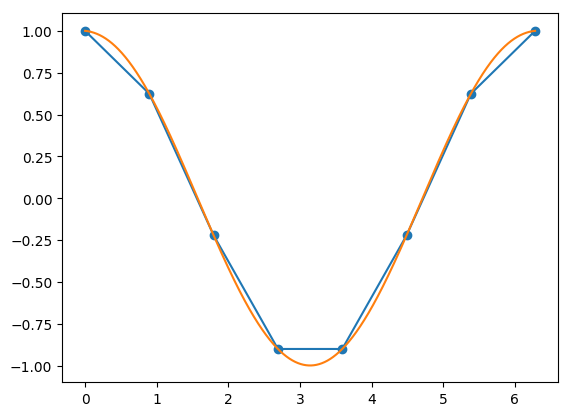

In [31]:
scatter(a,b)#ahora graficamos los puntos que interpolamos
plot(a,L(a));# y también los valores evaluados
plot(q,L(q));

notamos un parentezco aunque aun es lejano, se puede mejorar conforme se aumentan los puntos

ahora hacemos lo mismo pero para el coseno cuadrado y despues interpolaremos el conjunto [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]

In [39]:
h(x)=(cos(x)).^2

h (generic function with 1 method)

In [40]:
c=listaf(h,a)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] h(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[39]:1
 [4] listaf(::#h, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[2]:7
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [7] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##11#14)() at ./task.jl:335
while loading In[40], in expression starting on line 1


8-element Array{Float64,1}:
 1.0      
 0.38874  
 0.0495156
 0.811745 
 0.811745 
 0.0495156
 0.38874  
 1.0      

In [41]:
Lagrange(a,c)

  likely near In[41]:1
  likely near In[41]:1
  likely near In[41]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


0.00115014716636524*x*(x - 6.28318530717959)*(x - 5.38558740615393)*(x - 4.487
98950512828)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 1.795195802051
31) - 0.000439498814586378*x*(x - 6.28318530717959)*(x - 5.38558740615393)*(x 
- 4.48798950512828)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 0.89759
7901025655) + 0.012008376024402*x*(x - 6.28318530717959)*(x - 5.38558740615393
)*(x - 4.48798950512828)*(x - 3.59039160410262)*(x - 1.79519580205131)*(x - 0.
897597901025655) - 0.012008376024402*x*(x - 6.28318530717959)*(x - 5.385587406
15393)*(x - 4.48798950512828)*(x - 2.69279370307697)*(x - 1.79519580205131)*(x
 - 0.897597901025655) + 0.000439498814586379*x*(x - 6.28318530717959)*(x - 5.3
8558740615393)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 1.7951958020
5131)*(x - 0.897597901025655) - 0.00115014716636524*x*(x - 6.28318530717959)*(
x - 4.48798950512828)*(x - 3.59039160410262)*(x - 2.69279370307697)*(x - 1.795
19580205131)*(x - 0.897597901025655) + 0.00042266536

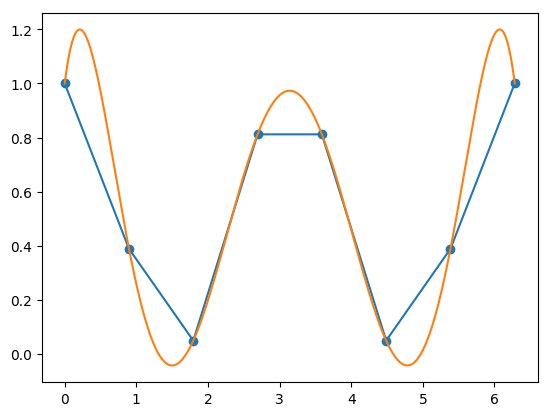

In [43]:
scatter(a,c)
plot(a,L(a));
plot(q,L(q));

In [44]:
x=[0,2,3,4,5,6,7]#ahora vamos ahacerlo con los puntos ya mencionados

7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [45]:
y=[10,-10,-4,0,5,20,-1]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

In [46]:
Lagrange(x,y)

                                                                              
                                                                              
x*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)   x*(x - 7)*(x - 6)*(x - 5)*(x - 4)*
----------------------------------------- - ----------------------------------
                    24                                          18            

                                                                              
                                                                              
(x - 2)   x*(x - 7)*(x - 6)*(x - 4)*(x - 3)*(x - 2)   5*x*(x - 7)*(x - 5)*(x -
------- + ----------------------------------------- - ------------------------
                              12                                           36 

                                                                  /  x    \   
                                                                  |- - + 1|*(x
 4)*(x - 3)*(x - 2)   x*(x - 6)*(x - 5)*(x - 4)*(x

In [48]:
w=linspace(0,7,10000)#hacemos esto para graficar practicamente de manera continua a L

0.0:0.0007000700070007:7.0

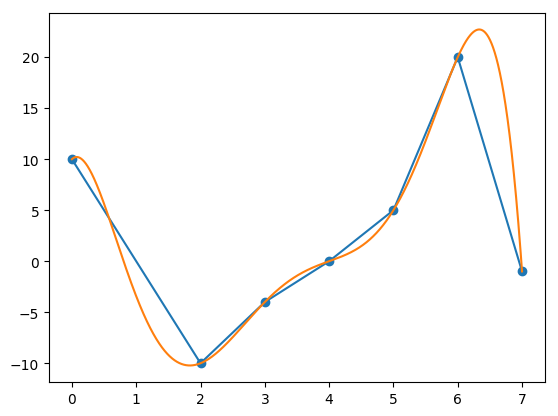

In [49]:
scatter(x,y)
plot(x,L(x));
plot(w,L(w));

Como se puede observar en ambas imagenes, si corta por donde debería, por tanto es una buena interpolación

## Convergencia de integración numérica

por ultimo crearemos un programa que nos diga que tanto se acercan las integrales numericas a la real(o al menos a la que realiza Jupyter por si mismo)

In [65]:
doc"""
esta función aplicara los metodos de simpson, rectangulos y de trapecios para comparar con el valor de $\int_{a,b}f(x)dx
introduzca (f,a,b,n(# de rectangulos,trapecios,etc))
"""
function CMI(f,a,b,n)
    #Se declaran arreglos que almacenarán los valores de los tres métodos distintos
    R=[] #Rectangulos
    T=[] #Trapecios
    S=[] #Simpson
    #Se adjunta una variable que almacenará el inverso de la longitud de cada subintervallo (b-a)/n es decir n/(b-a)
    h=[] #n/(b-a) para cada subintervalo
    #Declaramos la variable simbólica x
    x=Sym("x")
    g=f(x) #Función simbólica g
    I=ones(length(n))*integrate(g,(x,a,b)) # Vector columna cuyas entradas son todas el valor exacto de la integral segun Jupyter. 
    for i in 1:length(n)   # El ciclo sirve para calcular para los subintervalos la integral por los métodos propuestos. 
        push!(R,intr(f,a,b,n[i])) #Agregamos el valor por metodo de rectangulos a R
        push!(T,intt(f,a,b,n[i])) #Agregamos el valor por Trapecios a T
        push!(S,ints(f,a,b,n[i])) #Agregamos el valor por Simpson a S
        push!(h,n[i]/(b-a)) #Agregamos la inversa del ancho del intervalo
    end
    return R,T,S,h,I   #Se regresa un vector con primera entrada R, segunda T, tercer S, cuarta h y quinta I.
end;

In [66]:
f(x)=-sin(x)#esta sera la función que usaremos de prueba

f (generic function with 1 method)

In [67]:
n=1:12#hacemos que n vaya desde 1 hasta 12, esta es la cantidad de rect. etc

1:12

In [69]:
J=CMI(f,0,2*pi,n)#aplicamos a la función

(Any[-7.69468e-16, 0.0, 6.66134e-16, 2.22045e-16, -2.22045e-16, -3.33067e-16, 0.0, 5.55112e-17, 4.996e-16, -1.66533e-16, 9.71445e-16, -4.44089e-16], Any[1.53894e-15, 3.84734e-16, 6.88896e-17, 1.6269e-16, 8.57427e-17, 1.45467e-16, 1.08826e-16, 3.03389e-16, 2.26504e-16, 1.53894e-16, 1.39903e-16, 1.28245e-16], Any[-2.56489e-16, 0.0, 4.44089e-16, 2.22045e-16, -2.22045e-16, 2.22045e-16, 0.0, 5.55112e-17, 0.0, -1.38778e-16, -5.55112e-17, 5.82867e-16], Any[0.159155, 0.31831, 0.477465, 0.63662, 0.795775, 0.95493, 1.11408, 1.27324, 1.43239, 1.59155, 1.7507, 1.90986], SymPy.Sym[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ahora vamos a graficar los resultados de cada metodo conforme aumenta n

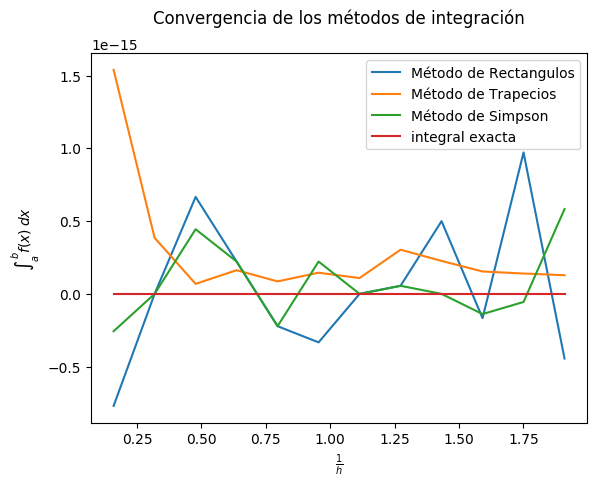

In [70]:

xlabel(L"$\frac{1}{h}$")
ylabel(L"$\int_{a}^{b}f(x)\:dx$")
title("Convergencia de los métodos de integración\n")
plot(J[4],J[1],label="Método de Rectangulos")#recordemos que J[1]=metodo rect, J[2]=metodo trap, J[3]=metodo simp, J[4]=1/h y
plot(J[4],J[2],label="Método de Trapecios")#J[5]=integral exacta
plot(J[4],J[3],label="Método de Simpson")
plot(J[4],J[5],label="integral exacta")
legend()
show();

ahora podemos observar por esta gráfica que el metodo de trapecios al inicio se acerca mucho del valor real, pero poco a poco se va alejando casi de manera uniforme conforme aumenta la cantidad de iteraciones, por otro lado el metodo de rectangulos se desvia y es caótico, pues en ocasiones lo rebasa y a veces es rebasado, finalmente el metodo de simpson conforme aumenta el numero de retangulos se acera más, recuerde que entre 1/h sea menor quiere decir que hay mas numero de rectangulos.
por tanto se concluye que para esta función el metodo de simpson resulta el mas acertado.